# Welcome to PYCON 2022!





# WebScraping with Selenium

This notebook shows how use selenium to scrape data from Indiegogo.com
The scope is only to understand the capabilities of web scraping and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://raw.githubusercontent.com/mauropelucchi/europython2021/main/notebook/EUROPYTHON_2021_Web_Scraping_with_Selenium.ipynb)


In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 9.2 MB/s 
     |████████████████████████████████| 358 kB 56.6 MB/s 
     |████████████████████████████████| 140 kB 35.0 MB/s 
     |████████████████████████████████| 58 kB 6.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-pr

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   **selenium**: to emulate the user behaviour
3.   **pandas**: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [2]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm.notebook import tqdm
import pandas
import json
import pprint

Note: if you want to run your scraper locally please:
1. Download ChromeDriver [https://chromedriver.chromium.org/downloads](https://chromedriver.chromium.org/downloads)
2. Import these libs

```
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint
```
3. Create your ChromeDriver
```
wd = webdriver.Chrome('<path where you stored chromedriver>/chromedriver',chrome_options=chrome_options)
```

First we need to set the options for the ghost browser.

The most important is `--headless` because we are in a "cloud" ntotebook on Google Colab.

In our local notebook we can remove the `--headless` option.  


In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
```



What does **user agent** mean??
[https://en.wikipedia.org/wiki/User_agent](https://en.wikipedia.org/wiki/User_agent) and [https://www.w3.org/WAI/UA/work/wiki/Definition_of_User_Agent](https://www.w3.org/WAI/UA/work/wiki/Definition_of_User_Agent)


> A user agent is any software that retrieves and presents Web content for end users or is implemented using Web technologies. User agents include Web browsers, media players, and plug-ins that help in retrieving, rendering and interacting with Web content.

In our case we are using the mark of "Mozilla/5.0...." to emulate a Chrome Browser.

You can find a valid user agent signature here:
[https://developers.whatismybrowser.com/useragents/explore/](https://developers.whatismybrowser.com/useragents/explore/)

In some case is better to user a specific user agent to infor the scraped web site:
> I am a bot, and I am scraping you



## First connection

In [4]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [5]:
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")

Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US but we are coming from different locale
- the screen ratio: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


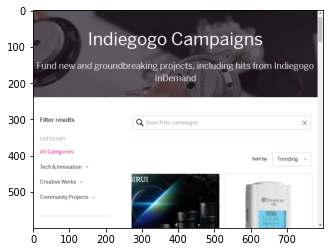

In [6]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [7]:
print(wd.title)

Explore Crowdfunding Campaigns & Unique Products | Indiegogo


### First exercise with *Selenium*

Try it yourself... Print the contents of the page on the screen!

Complete the code and annotate the different behaviour.

Try to use the attributes/methods applied to `wd`

- `page_source`
- `find_element_by_tag_name("body")`
- `find_element_by_tag_name("body").text`




In [8]:
print(....)

SyntaxError: ignored

### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements(By.CSS_SELECTOR, ...)`.

We will pass our CSS Selector into this method and get a list of selenium elements.

Once we have the element, we can extract the text inside it using the `text` function.

In [11]:
from selenium.webdriver.common.by import By
list_titles = wd.find_elements(By.CSS_SELECTOR, "div.discoverableCard-title")
print(len(list_titles))

12


In [12]:
print(list_titles[0].text)
print(list_titles[1].text)

SIRUI : The Most Affordable 2x Anamorphic Solution
VM2: The Next-Gen VMU for the Dreamcast


### Exercise on *find_elements(By.CSS_SELECTOR, ...)*

Try to export the list of `div.discoverableCard-description` elements and show the content of the first element.


**Scope: get the description of the projects**




In [ ]:
list_description = wd......("...")
print(len(list_description))

# Project List from Indiegogo

Let's begin to download the list of projects.

The list of projects is defined by the css selection rule
`discoverable-card`



![](https://raw.githubusercontent.com/mauropelucchi/europython2021/main/img/indiegogo_1.png)



In [13]:
list_projects = wd.find_elements(By.CSS_SELECTOR, "discoverable-card")
print(len(list_projects))

12


In [23]:
list_projects[0]

<selenium.webdriver.remote.webelement.WebElement (session="7b216e04704ef48e96ad4fc3219b028f", element="20b9a687-a258-43b4-8ca4-82c4f766f686")>

Gread! We find 12 project!

Now, we will extract the attribute from each single element.
The scope is to create one dict for each project in the list with the attribute:


1.   url
2.   title
3.   description
4.   category
5.   progress



In [15]:
import pprint
detail_projects = []
for project in list_projects:
    url = project.find_elements(By.CSS_SELECTOR, "a")[0].get_attribute("href")
    title = ""
    description = ""
    category = ""
    project_id = ""
    balance = ""
    currency = ""
    image = ""
    progress = ""
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-title")) > 0):
      title = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-title")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-description")) > 0):
      description = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-description")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-category")) > 0):
      category = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-category")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-balance")) > 0):
      balance = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-balance")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-percent")) > 0):
      progress = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-percent")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-unitsRaised")) > 0):
      currency = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-unitsRaised")[0].text
    project_id = url
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-image")) > 0):
      image = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-image")[0].get_attribute("data-bgset")

    detail_projects.append({'url': url,
                            'image': image,
                            'title': title,
                            'description': description,
                            'category': category,
                            'balance': balance,
                            'currency': currency,
                            'progress': progress,
                            'project_id': project_id})


In [16]:
len(detail_projects)
pprint.pprint(detail_projects[0:2])

[{'balance': '$684,861 ',
  'category': 'CAMERA GEAR',
  'currency': 'USD raised',
  'description': 'SIRUI 35mm &100mm 1.6x Full-Frame Anamorphic Lenses + SIRUI '
                 '1.25x Anamorphic Adapter',
  'image': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/xhqwwsbddobthhyhukvp.jpg',
  'progress': '6,849%',
  'project_id': 'https://www.indiegogo.com/projects/sirui-the-most-affordable-2x-anamorphic-solution/pica',
  'title': 'SIRUI : The Most Affordable 2x Anamorphic Solution',
  'url': 'https://www.indiegogo.com/projects/sirui-the-most-affordable-2x-anamorphic-solution/pica'},
 {'balance': '€40,663 ',
  'category': 'VIDEO GAMES',
  'currency': 'EUR raised',
  'description': 'Micro-SD storage. Upgraded LCD. Embedded Battery. Micro-USB '
                 'port.',
  'image': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/mygnhhnrslwfftac2mzo.jpg',
  'progress': '45%',
  'project_id': 'https://www.indie

Now let's try downloading all the ads on the front page...
and then move on to the second page...

First we define a `parse_project` function to make the code cleaner and to reuse the function.

In [17]:
def parse_project(project):
  url = project.find_elements(By.CSS_SELECTOR, "a")[0].get_attribute("href")
  title = ""
  description = ""
  category = ""
  project_id = ""
  balance = ""
  currency = ""
  progress = ""
  image = ""
  try:
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-title")) > 0):
      title = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-title")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-description")) > 0):
      description = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-description")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-category")) > 0):
      category = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-category")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-balance")) > 0):
      balance = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-balance")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-percent")) > 0):
      progress = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-percent")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-unitsRaised")) > 0):
      currency = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-unitsRaised")[0].text
    if(len(project.find_elements(By.CSS_SELECTOR, ".discoverableCard-image")) > 0):
      image = project.find_elements(By.CSS_SELECTOR, ".discoverableCard-image")[0].get_attribute("data-bgset")
    project_id = url
  except:
    pass
  return {'url': url,
          'title': title,
          'image': image,
          'description': description,
          'category': category,
          'balance': balance,
          'currency': currency,
          'progress': progress,
          'project_id': project_id}


Here's how to download the first page of projects...

In [18]:
detail_projects = []
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
wd.save_screenshot(f'screenshot.png')
list_projects = wd.find_elements(By.CSS_SELECTOR, "discoverable-card")
for project in tqdm(list_projects):
  detail_projects.append(parse_project(project))

print(len(detail_projects))

  0%|          | 0/12 [00:00<?, ?it/s]

12


Have you seen the **tqdm**!

Find at this link all the documentation **https://github.com/tqdm/tqdm**:
is very useful to make our notebook more nice...

### How to end scraping?
Problem: When do we stop?

There are several ways. Some simpler and some more advanced:
- We can search inside the page for the ad number and divide it by 12
- We can check the status of the request (if (status_code == 200):... for a list of possible http status codes please check https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- We can check the number of ads found (if > 0...)
- Other more advanced techniques...

For example, in our case, let's go to verify the presence, or not, of the *Snow more* button inside the page. If present, we continue scraping, otherwise we stop.

Actually, we can also combine more than one of these techniques.



The cookie law form...

Can we click the button? Of course... it's better to click and hide the form to avoid issue during the scraping: remember we have to emulate the user navitagion


```
if (len(wd.find_elements(By. ID, "CybotCookiebotDialogBodyButtonAccept")) > 0):
  print("Click cookie law button")
  wd.find_elements(By. ID, "CybotCookiebotDialogBodyButtonAccept")[0].click()
```
The 

```
.click()
```
method emulates the user click on a button, a area, an image, ...



In [22]:
import time
detail_projects = []
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
time.sleep(5)
wd.save_screenshot("check_browser.png")

if (len(wd.find_elements(By. ID, "CybotCookiebotDialogBodyButtonAccept")) > 0):
  print("Click cookie law button")
  wd.find_elements(By. ID, "CybotCookiebotDialogBodyButtonAccept")[0].click()

for num in tqdm(range(1,10)):
  items = (num - 1) * 12
  list_projects = wd.find_elements(By.CSS_SELECTOR, f"discoverable-card:nth-child(n+{items})")
  for project in list_projects:
    detail_projects.append(parse_project(project))
  if (len(wd.find_elements(By.CSS_SELECTOR, ".i-cta-1")) > 0):
    wd.find_elements(By.CSS_SELECTOR, ".i-cta-1")[0].click()
    time.sleep(3)
    wd.save_screenshot("check_browser.png")
  else:
    break



  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
print(len(detail_projects))
print(detail_projects[30:32])

# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(detail_projects)
ds_detail_projects.set_index("project_id")
ds_detail_projects.head()

The `.info()` method provides an indication of the structure and data of the `DataFrame`.

In [ ]:
ds_detail_projects.info()

In [ ]:
ds_detail_projects.to_csv('ds_projects.csv')

We are storing the data on our temporary area. In Google Colab is also possible to store files and data on our Google Drive.

# Indiegogo Project pages ###

Now, the goal is to navigate and download the details of each project and pictures of the houses.

**Pandas** provides the *.read_csv* method that allows you to upload in CSV format files within a DataFrame.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

***For each project we go to the link... how do you think we do it?***

Let's try the first 5 projects.



These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. Using waits, we can stop our scraping and wait the loading of a element.

Selenium Webdriver provides two types of waits - implicit & explicit. An explicit wait makes WebDriver wait for a certain condition to occur before proceeding further with execution. An implicit wait makes WebDriver poll the DOM for a certain amount of time when trying to locate an element.


In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for project_id, project in ds_detail_projects.head().iterrows():
    link = project["url"]
    print(link)
    wd.set_window_size(1920, 1080)
    wd.get(link)
    try:
      WebDriverWait(wd, 10).until(
          EC.element_to_be_clickable((By.CSS_SELECTOR, "div.basicsBackerActions"))
      )
    except:
      continue

    backers = wd.find_elements(By.CSS_SELECTOR, ".basicsGoalProgress-claimedOrBackers")[0].text
    goal = wd.find_elements(By.CSS_SELECTOR, ".basicsGoalProgress-progressDetails-detailsGoal-goalPercentageOrInitiallyRaised")[0].text
    left = wd.find_elements(By.CSS_SELECTOR, ".basicsGoalProgress-progressDetails-detailsTimeLeft")[0].text
    location = wd.find_elements(By.CSS_SELECTOR, ".basicsCampaignOwner-details-city")[0].text
    owner = wd.find_elements(By.CSS_SELECTOR, ".campaignOwnerName-tooltip")[0].text
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'left': left,
                    'owner': owner,
                    'location': location})
  
len(details)
pprint.pprint(details)


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
ds_detail_projects = ds_detail_projects.head(n = 20)
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
    time.sleep(1)
    link = project["url"]
    backers = 0
    goal = 0
    left = 0
    location = ""
    owner = ""

    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      backers = wd.find_elements(By.CSS_SELECTOR, ".basicsGoalProgress-claimedOrBackers")[0].text
      goal = wd.find_elements(By.CSS_SELECTOR, ".basicsGoalProgress-progressDetails-detailsGoal-goalPercentageOrInitiallyRaised")[0].text
      left = wd.find_elements(By.CSS_SELECTOR, ".basicsGoalProgress-progressDetails-detailsTimeLeft")[0].text
      location = wd.find_elements(By.CSS_SELECTOR, ".basicsCampaignOwner-details-city")[0].text
      owner = wd.find_elements(By.CSS_SELECTOR, ".campaignOwnerName-tooltip")[0].text
    except Exception as e:
      print(e)
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'left': left,
                    'owner': owner,
                    'location': location})
  



In [ ]:
print(len(details))
pprint.pprint(details[0:2])

Store the data with *pandas*

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("project_id")
ds_details.head()

In [ ]:
ds_details.info()

In [ ]:
ds_details.to_csv("ds_project_details.csv")

# Indiegogo Project images


Now we're going to download Indiegogo images for each project.

Our goal is to create a dataset of images and a `Dataframe` composed by:
- `project_id`
- `image_id`

We will use the library `requests`.

The `requests` library is python library for making HTTP requests.
It abstracts the complexities of making requests behind a simple API so that you can focus on interacting with services and consuming data in your application.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

Let's create a folder where store the images

In [ ]:
!mkdir images

In [ ]:
import time
import requests

detail_projects = []
list_images = []
num = 0
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  num = num + 1
  try:
    list_images.append({"project_id": project_id,
                        "img_file": "img_" + str(num) + ".jpg"})
    src = project['image']
    img_file = requests.get(src, stream=True)
    if img_file.status_code == 200:
      with open("/content/images/img_" + str(num) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)



In [ ]:
print(len(list_images))

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/images/img_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("project_id")
ds_images.head()

In [ ]:
ds_images.info()

In [ ]:
ds_images.to_csv("ds_images.csv")


In [ ]:
!zip -r "/content/images.zip" "/content/images/"


# Use API to get data from Indiegogo

![](https://raw.githubusercontent.com/mauropelucchi/europython2021/main/img/network_tab.png)

In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

import requests
from tqdm.notebook import tqdm
import pandas
import pprint
import pandas as pd
import json

[https://docs.python-requests.org/en/master/](https://docs.python-requests.org/en/master/)

> Requests allows you to send HTTP/1.1 requests extremely easily. There’s no need to manually add query strings to your URLs, or to form-encode your POST data. Keep-alive and HTTP connection pooling are 100% automatic, thanks to urllib3.

In [ ]:
project_list = []


# We are scraping 50 pages
for page in tqdm(range(1, 50)):
  payload = {"sort": "most_funded",
            "category_main": None,
            "category_top_level": "Creative Works",
            "project_timing": "all",
            "project_type": "campaign",
            "tags":[],
            "page_num": page,
            "per_page": 100,
            "q": ""}
  r = requests.post('https://www.indiegogo.com/private_api/discover',
                  headers={'Content-type': 'application/json; charset=UTF-8', "User-Agent": "curl/7.64.1"},
                  json=payload)
  # print(r)
  my_projects = r.json()['response']['discoverables']
  project_list.extend(my_projects)

In [ ]:
len(project_list)

In [ ]:
pprint.pprint(project_list[0:2])

In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(project_list)
ds_detail_projects.set_index("project_id")
ds_detail_projects.head()

In [ ]:
ds_detail_projects.to_csv("/content/1_ds_project_details_full.csv")

In [ ]:
ds_detail_projects = pd.read_csv("/content/1_ds_project_details_full.csv", index_col="project_id")


# [Advanced] How to use a proxy to hide our connection

RequestProxy is used to **hide** our connection...

In [ ]:
!pip install http-request-randomizer

In [ ]:
from http_request_randomizer.requests.proxy.requestProxy import RequestProxy
req_proxy = RequestProxy()
proxies = req_proxy.get_proxy_list()

2021-07-22 22:06:16,595 http_request_randomizer.requests.useragent.userAgent INFO     Using local file for user agents: /usr/local/lib/python3.7/dist-packages/http_request_randomizer/requests/proxy/../data/user_agents.txt
2021-07-22 22:06:16,600 root   DEBUG    === Initialized Proxy Parsers ===
2021-07-22 22:06:16,602 root   DEBUG    	 FreeProxy parser of 'http://free-proxy-list.net' with required bandwidth: '150' KBs
2021-07-22 22:06:16,604 root   DEBUG    	 PremProxy parser of 'https://premproxy.com/list/' with required bandwidth: '150' KBs
2021-07-22 22:06:16,606 root   DEBUG    	 SslProxy parser of 'https://www.sslproxies.org' with required bandwidth: '150' KBs
2021-07-22 22:06:16,607 root   DEBUG    =================================
2021-07-22 22:06:16,867 root   DEBUG    Added 300 proxies from FreeProxy
2021-07-22 22:06:17,299 http_request_randomizer.requests.parsers.PremProxyParser WARNING  Proxy Provider url failed: https://premproxy.com/list/
2021-07-22 22:06:17,300 http_reque

In [ ]:
ind = [] #int is list of Italy proxy
for proxy in proxies:
    if proxy.country == 'Canada':
        ind.append(proxy)

PROXY = ind[0].get_address()
print(PROXY)

print(ind[0].country)

51.222.21.92:32768
Canada


In [ ]:
chrome_options.add_argument('--proxy-server=%s' % PROXY)

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
wd.set_window_size(1920, 1080)
wd.get("https://whatismyipaddress.com/")

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()